#Naive Bayes Classification
* Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets.

**Classifying text**
* One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups ##This tool gives us a bunch of news articles to work with

data = fetch_20newsgroups()
data.target_names #This shows us the names of those topics from newsgroup

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

* Here, we have considered just a few categories

In [ ]:
categories = ['talk.religion.misc','soc.religion.christian','sci.space','rec.sport.baseball','comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test',categories=categories)

In [ ]:
print(train.data[5])

From: jgreen@trumpet.calpoly.edu (James Thomas Green)
Subject: Keeping Spacecraft on after Funding Cuts.
Organization: California Polytechnic State University, San Luis Obispo
Lines: 51

Why do spacecraft have to be shut off after funding cuts.  For
example, Why couldn't Magellan just be told to go into a "safe"
mode and stay bobbing about Venus in a low-power-use mode and if
maybe in a few years if funding gets restored after the economy
gets better (hopefully), it could be turned on again.  

For that matter, why exactly were the Apollo lunar experiments
"turned off" rather than just "safed".  Was it political (i.e.
as along as they could be used, someone would keep bugging
congress for funds)?  Turning them off keeps them pesky
scientists out of the bureaucrat's hair....  

I've heard the argument that an active but "uncontrolled"
spacecraft causes "radio noise."  I find that hard to believe
that this could be a problem in a properly designed "safe" mode.
This safe mode could be a p

In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers. For this we will use the TF-IDF vectorizer, and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer #takes the words in the articles and turns them into numbers
from sklearn.naive_bayes import MultinomialNB  # It will learn from the training articles and try to guess the topic of new ones
from sklearn.pipeline import make_pipeline  #This connects the two steps (turning words into numbers and making guesses) so they work together easily.

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
#with this pipeline, we can apply the model to training data and predict labels for test data

In [ ]:
model.fit(train.data, train.target)
labels = model.predict(test.data)


 we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator. For example, here is the confusion matrix between the true and predicted labels for the test data:

Text(113.92222222222219, 0.5, 'predicted label')

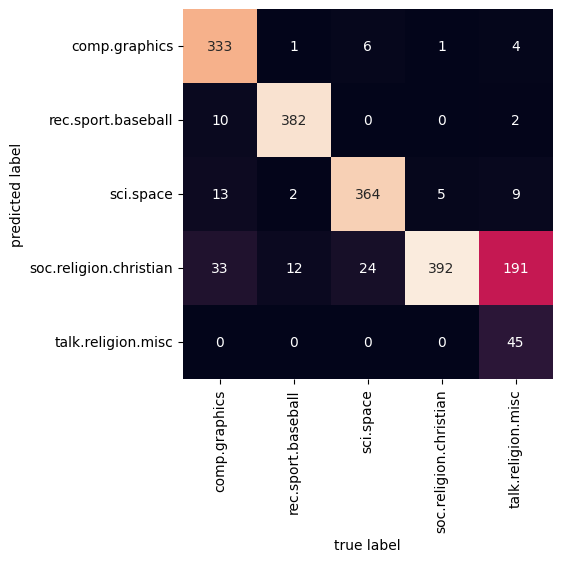

In [ ]:

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot =True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names) #Fixed typo in 'xticklabels'
plt.xlabel('true label')
plt.ylabel('predicted label')

This very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity. This is perhaps an expected area of confusion

In [ ]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [ ]:
predict_category('sending a payload to the ISS')

'sci.space'

In [ ]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [ ]:
predict_category('determining the screen resolution')

'comp.graphics'

**Summary**
* This code teaches a computer model to read and understand text (like news articles) and then guess what the text is about (e.g., religion, space, sports). It learns from examples, gets tested on new examples, and can even make guesses on completely new sentences you give it!

#Naive Bayes classifiers tend to perform especially well in one of the following situations:

- When the naive assumptions actually match the data (very rare in practice).
- For very well-separated categories, when model complexity is less important.
- For very high-dimensional data, when model complexity is less important.